In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/GlobalTemperatures.csv')

In [3]:
data.loc[:5]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dates = data['dt']

In [5]:
dates.loc[0]

'1750-01-01'

In [6]:
def date_transform(date):
    date = date.split('-')
    return int(date[0])*100+int(date[1])

In [7]:
dates = dates.apply(date_transform)

In [8]:
x = dates[:12]
y = data['LandAverageTemperature'][:12]
error =  data['LandAverageTemperatureUncertainty'][:12]
plt.rcParams['figure.figsize'] = [15, 5]

Text(0, 0.5, 'Temperature in degree C')

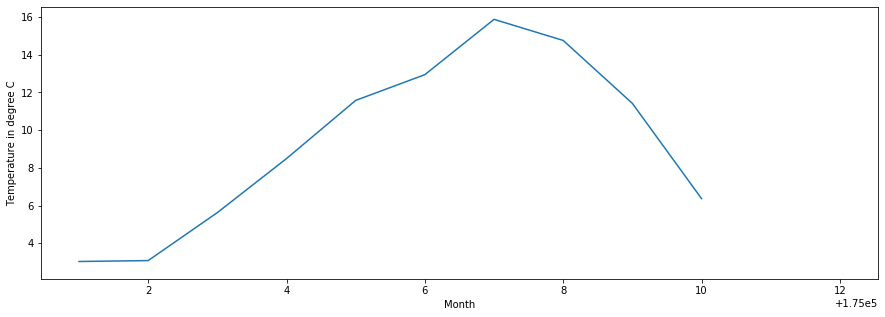

In [9]:
plt.plot(x, y, label='both limits (default)')
plt.xlabel('Month')
plt.ylabel('Temperature in degree C')

## Plotting year-wise variation from 1750 - 2015 on a month scale

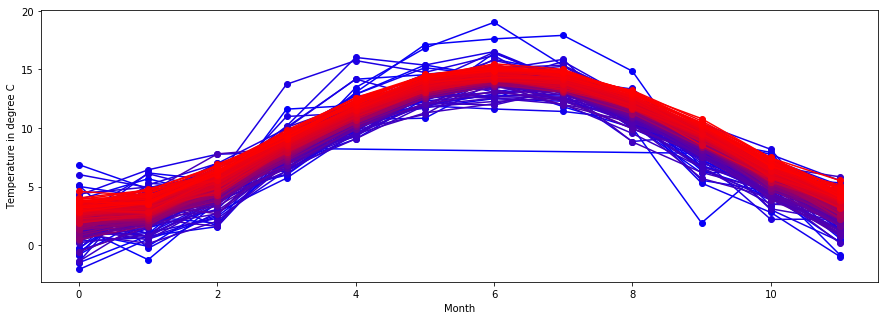

In [97]:
x = np.arange(0,12)
for i in range(266):
    y = np.array(data['LandAverageTemperature'][i*12:(i+1)*12])
    nanmask = np.isfinite(y)
    #error =  data['LandAverageTemperatureUncertainty'][i*12:(i+1)*12]
    color = (0.0+ i/266, 0.0 ,1 - i/266)
    plt.plot(x[nanmask], y[nanmask], color = color ,linestyle='-', marker='o')

    plt.xlabel('Month')
    plt.ylabel('Temperature in degree C')
    
    

## Average Temperature by year

In [19]:
data['datetime'] = pd.to_datetime(data.dt)

In [25]:
data['year'] = pd.DatetimeIndex(data.datetime).year
data['month'] = pd.DatetimeIndex(data.datetime).month

In [76]:
# data.month.value_counts()

In [77]:
land_avg_by_yr = data.groupby('year')['LandAverageTemperature'].mean()
data['decade'] = ((data.year//10)*10)
land_avg_by_decade = data.groupby('decade')['LandAverageTemperature'].mean()

In [90]:
def two_subplots(df1, df2, title1, title2):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    df1.plot(title = title1)
    plt.subplot(122)
    df2.plot(title = title2)
    plt.show()

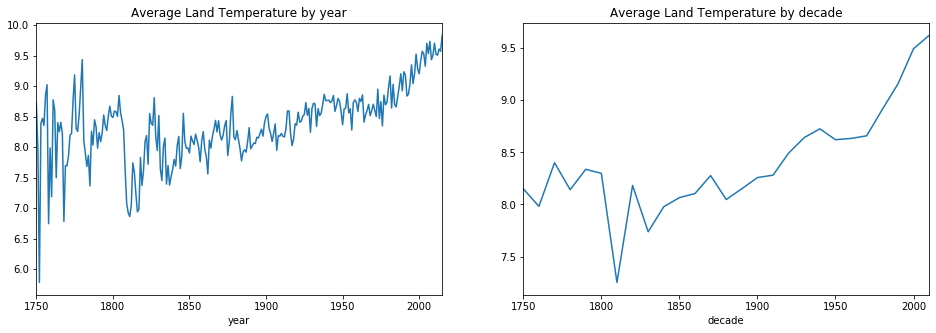

In [92]:
two_subplots(land_avg_by_yr, land_avg_by_decade, 'Average Land Temperature by year'\
            , 'Average Land Temperature by decade')

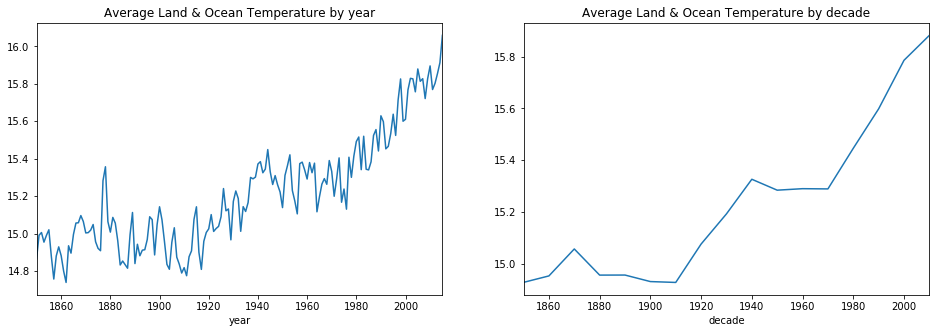

In [93]:
avg_by_yr = data.groupby('year')['LandAndOceanAverageTemperature'].mean()
avg_by_decade = data.groupby('decade')['LandAndOceanAverageTemperature'].mean()

# as no data before 1850
avg_by_yr.dropna(inplace=True)
avg_by_decade.dropna(inplace=True)

two_subplots(avg_by_yr, avg_by_decade, 'Average Land & Ocean Temperature by year'\
            , 'Average Land & Ocean Temperature by decade')

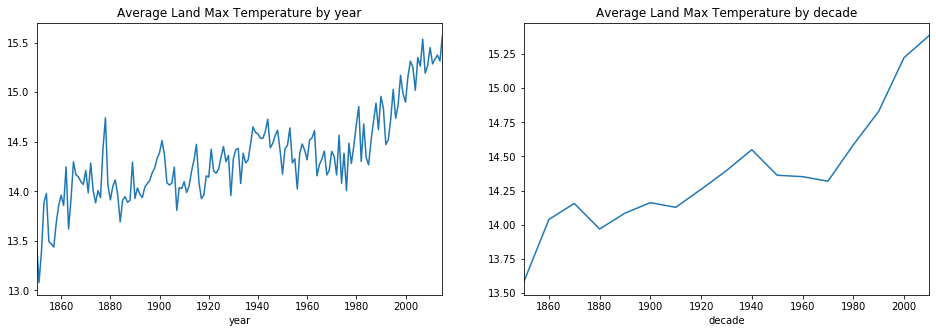

In [98]:
# LandMaxTemperature
# data.LandMaxTemperature.plot()

avg_max_temp_by_yr = data.groupby('year')['LandMaxTemperature'].mean()
avg_max_temp_by_decade = data.groupby('decade')['LandMaxTemperature'].mean()

# as no data before 1850
avg_max_temp_by_yr.dropna(inplace=True)
avg_max_temp_by_decade.dropna(inplace=True)

two_subplots(avg_max_temp_by_yr, avg_max_temp_by_decade, 'Average Land Max Temperature by year'\
            , 'Average Land Max Temperature by decade')

### Lowest temperature by year/decade

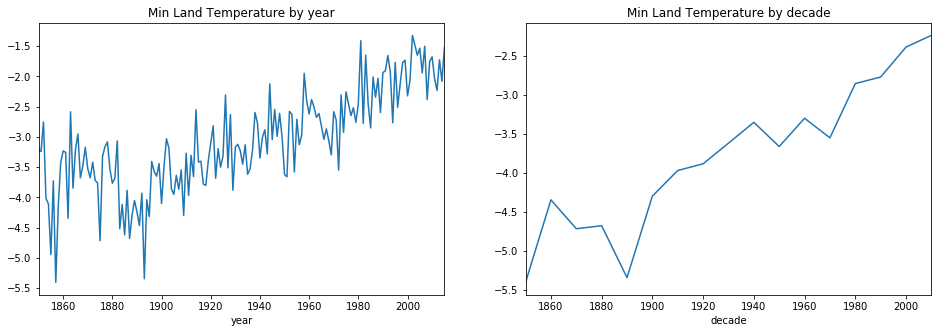

In [100]:
min_temp_by_yr = data.groupby('year')['LandMinTemperature'].min()
min_temp_by_decade = data.groupby('decade')['LandMinTemperature'].min()

# as no data before 1850
min_temp_by_yr.dropna(inplace=True)
min_temp_by_decade.dropna(inplace=True)

two_subplots(min_temp_by_yr, min_temp_by_decade, 'Min Land Temperature by year'\
            , 'Min Land Temperature by decade')